In [1]:
import sys
import json
import warnings

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sys.path.append('../..')
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
from utils import UnimapResult, set_plot_theme, generate_positions
set_plot_theme()
warnings.filterwarnings('ignore')

/home/hht/.conda/envs/unimap1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### UMAP

In [2]:
result = UnimapResult('cross_species', 'unimap/2023', root_dir='../../results', detailed=False)
umap1 = result.st_umap_result['umap1']
umap2 = result.st_umap_result['umap2']
umap1_ref = result.s_umap_result['umap1']
umap2_ref = result.s_umap_result['umap2']

# * 4 labels
batch_labels = result.st_result['batch']
ct_labels = ['Human Reference'] * len(result.s_result) + list(result.t_result['celltype'])
pd_ct = ['Human Reference'] * len(result.s_result) + list(result.t_result['pred_celltype'])
confidence_labels = result.st_result.pred_cell_prob


pd_results_labels = result.st_result['celltype'] == result.st_result['pred_celltype']
pd_results_labels[confidence_labels < 0.25] = "Unknown"
pd_results_labels[result.st_result.domain == 'source'] = "Human Reference"
pd_results_labels = pd_results_labels.replace({False: "Wrong", True: "Correct"})
# confidence_labels = confidence_labels.fillna('Human reference')
color_dict = json.load(open('../../color_dict.json'))
batch_c = color_dict["4_sp_batch"]
ct_c = color_dict["4_sp_ct"]

In [3]:
batch_c = {
        "human": "#F8D5E4",
        "macaqueF": "#BAD65D",
        "macaqueM": "#EE7D6B",
        "mouse": "#930E14"
        }
ct_c = {
  "Human Reference": "#E0E0E0",
        "CiliaryMuscle Cell": "#8fcdc2",
        "Beam Cell": "#eec458",
        "Schwann Cell": "#df789d",
        "Corneal Epithelium Cell": "#9e9ac8",
        "Macrophage Cell": "#969696",
        "Uveal": "#ab4b21",
        "Melanocyte": "#97ba22",
        "JCT Cell": "#e6833c",
        "NK/T Cell": "#ad494a",
        "Pericyte": "#a55194",
        "Fibroblast": "#9ecae1",
        "Vascular Endothelium Cell": "#699fce",
        "Pigmented Ciliary Epithelium Cell": "#20663a",
        "Schlemm Canal Cell": "#322d63",
        "B Cell": "#bdbdbd",
        "Mast Cell": "#6b6ecf",
        "Nonpigmented Ciliary Epithelium Cell": "#b5cf6b",
        "SchwalbeLine Cell": "#e7ba52",
        "Collector Channel Cell": "#8a4893",  # #d6616b
        "Pigmented Epithelium Cell": "#ce6dbd",
        "Myoepithelium": "#c6dbef",
        "Neuron Cell": "#fdd0a2"
}

In [ ]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()
w, h = 0.21, 0.21 / (250/185)

positions = [[0.04, 0.70, w, h], [0.27, 0.70, w, h], [0.50, 0.70, w, h], [0.73, 0.70, w, h],]

p1 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.15, hue=batch_labels,      edgecolor='none', palette=batch_c, ax=fig.add_axes(positions[0]), rasterized=True)
p2 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.15, hue=ct_labels,         edgecolor='none', palette=ct_c, ax=fig.add_axes(positions[1]), rasterized=True)

p4_f = sns.scatterplot(x=umap1_ref, y=umap2_ref, alpha=0.9, s=0.15, hue=['Human Reference'] * len(result.s_result), edgecolor='none', palette=ct_c, ax=fig.add_axes(positions[2]), rasterized=True)
p4 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.15, hue=confidence_labels, edgecolor='none', palette='inferno', ax=fig.add_axes(positions[2]), rasterized=True)
p5 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.15, hue=pd_results_labels, edgecolor='none', palette={'Human Reference': '#E0E0E0', 'Correct': '#719e2a', 'Wrong': '#be0f20', 'Unknown': '#7a87a1'}, ax=fig.add_axes(positions[3]), rasterized=True)

result.remove_spines(p1)
result.remove_spines(p2)
# result.remove_spines(p3)
result.remove_spines(p4_f)
result.remove_spines(p4)
result.remove_spines(p5)
result.remove_ticks(p1)
result.remove_ticks(p2)
# p3 = result.remove_ticks(p3, remove_legend=True)
result.remove_ticks(p4_f, remove_legend=True)
result.remove_ticks(p4, remove_legend=True)
result.remove_ticks(p5)
p1.set_title('Species', fontsize=7, pad=3)
p2.set_title('Ground Truth', fontsize=7, pad=3)
# p3.set_title('Prediected Result', fontsize=7, pad=3)
p4.set_title('Query Cell Weight', fontsize=7, pad=3)
p5.set_title('Correctness', fontsize=7, pad=3)


p1.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False, markerscale=8, fontsize=5, labelspacing=0, handletextpad=0.1)

handles, labels = p2.get_legend_handles_labels()

order = ['Human Reference', 'B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Corneal Epithelium Cell', 'JCT Cell', 'Macrophage Cell', 'Melanocyte', 'NK/T Cell', 'Pericyte', 'Schlemm Canal Cell', 'Schwann Cell', 'Vascular Endothelium Cell', 'Collector Channel Cell', 'Fibroblast', 'SchwalbeLine Cell', 'Mast Cell',  'Neuron Cell','Myoepithelium', 'Nonpigmented Ciliary Epithelium Cell', 'Pigmented Ciliary Epithelium Cell', 'Pigmented Epithelium Cell', 'Uveal']

sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: order.index(x[1]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

p2.legend(sorted_handles, sorted_labels, loc='upper left', bbox_to_anchor=(0.15, 0), frameon=False, markerscale=8, fontsize=5, labelspacing=0.2, ncol=4, columnspacing=2, handletextpad=0.1)
p5.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False, markerscale=8, fontsize=5, labelspacing=0, handletextpad=0.1)
# cbar
cbar_ax = fig.add_axes([0.68, 0.71, 0.007, 0.03])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=0, vmax=1)
sm2 = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm2.set_array([])
cbar = fig.colorbar(sm2, cax=cbar_ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['0', '1'])
cbar.ax.tick_params(labelsize=5, length=3, pad=1, width=0.5)

In [5]:
positions = [[0.08, 0.61, 0.19, 0.20 / (250/185) /2],
             [0.08, 0.51, 0.19, 0.20 / (250/185) /2]]

def cal_acc(group, batch, interval=0.1):
    acc_df = pd.DataFrame(columns=['interval', 'acc', 'species'])
    for i in np.arange(0.1, 1.1, interval):
        # print(i)
        i_interval = group[(group['pred_cell_prob'] < i) & (group['pred_cell_prob'] > (i - interval))]
        acc = i_interval['pred_reulst'].sum() / i_interval.shape[0]
        acc_df = pd.concat([acc_df, pd.DataFrame({'interval': str((i - interval/2).round(2)), 'acc': acc, 'species': batch}, index=[batch + "_" + str(int(i*10))])])
    return acc_df
acc_df = pd.DataFrame(columns=['interval', 'acc', 'species'])

result = UnimapResult('cross_species', 'unimap/2023', root_dir='../../results', detailed=False)
result.t_result['pred_reulst'] = result.t_result['celltype'] == result.t_result['pred_celltype']
for batch, group in result.t_result.groupby('batch'):
    group_acc_df = cal_acc(group, batch)
    acc_df = pd.concat([acc_df, group_acc_df], axis=0)

acc_df['interval'] = pd.to_numeric(acc_df['interval'])
mf_acc_df = acc_df[acc_df['species'] == 'macaqueF']
mm_acc_df = acc_df[acc_df['species'] == 'macaqueM']
mouse_acc_df = acc_df[acc_df['species'] == 'mouse']


ax2 = fig.add_axes(positions[0])

ax2.plot(mf_acc_df['interval'], mf_acc_df['acc'], linestyle='-', marker='$|—————|$', markersize=6, label='macaqueF', linewidth=0.5, color='#BAD65D',)
ax2.plot(mm_acc_df['interval'], mm_acc_df['acc'], linestyle='-', marker='$|—————|$', markersize=6, label='macaqueM', linewidth=0.5, color='#EE7D6B',)
ax2.plot(mouse_acc_df['interval'], mouse_acc_df['acc'], linestyle='-', marker='$|—————|$', markersize=6, label='mouse', linewidth=0.5, color='#930E14',)

ax2.set_xlim(-0.1, 1.2)
ax2.set_xticks(np.arange(0, 1.1, 0.1))
ax2.yaxis.set_tick_params(pad=2)
ax2.xaxis.set_tick_params(pad=2)
ax2.tick_params(bottom=True, left=True, width=0.5, length=2)
# ax2.set_xticklabels([])
ax2.set_xlabel(' ', fontsize=6)
ax2.set_ylabel('Accuracy', fontsize=6)
# ax2.grid(True, linestyle='--', color='#E0E0E0', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=5)
ax2.tick_params(axis='y', labelsize=5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


rect1 = Rectangle((0, 0), 1, 1, fc='#F8D5E4', ec='#F8D5E4', lw=2)  # Human
rect3 = Rectangle((0, 0), 1, 1, fc='#BAD65D', ec='#BAD65D', lw=2)  # MacaqueF
rect2 = Rectangle((0, 0), 1, 1, fc='#EE7D6B', ec='#EE7D6B', lw=2)  # MacaqueM
rect4 = Rectangle((0, 0), 1, 1, fc='#930E14', ec='#930E14', lw=2)  # Mouse


In [6]:
species_list = ['human', 'macaqueF', 'macaqueM', 'mouse']
species_color_dict = {'human': '#F8D5E4', 'macaqueF': '#BAD65D', 'macaqueM': '#EE7D6B', 'mouse': '#930E14'}
result = UnimapResult('cross_species', 'unimap/2023', root_dir='../../results', detailed=False)
ax0 = fig.add_axes(positions[1])
mf_density_df = result.st_result[result.st_result['batch'] == 'macaqueF']['pred_cell_prob']

sns.kdeplot(data=result.st_result[result.st_result['batch'] != 'human'], x='pred_cell_prob', hue='batch', fill=True, common_norm=False, palette=species_color_dict, ax=ax0, linewidth=0.5)
ax0.set_xlim(-0.1, 1.2)
ax0.set_xticks(np.arange(0, 1.1, 0.1))
ax0.yaxis.set_tick_params(pad=2)
ax0.xaxis.set_tick_params(pad=2)
ax0.tick_params(bottom=True, left=True, width=0.5, length=2)
ax0.set_xlabel('Query Cell Weight', fontsize=6)
ax0.set_ylabel('Density', fontsize=6)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
# ax0.grid(True, linestyle='--', color='#E0E0E0', linewidth=0.5)
ax0.tick_params(axis='x', labelsize=5)
ax0.tick_params(axis='y', labelsize=5)
def format_func(value, tick_number):
    return f'{value:.1f}'

ax0.yaxis.set_major_formatter(FuncFormatter(format_func))
ax0.legend_.remove()

### CELL Number

In [7]:
ct = ['B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Corneal Epithelium Cell', 'JCT Cell', 'Macrophage Cell', 'Melanocyte', 'NK/T Cell', 'Pericyte', 'Schlemm Canal Cell', 'Schwann Cell', 'Vascular Endothelium Cell', 'Myoepithelium', 'Nonpigmented Ciliary Epithelium Cell', 'Pigmented Ciliary Epithelium Cell', 'Pigmented Epithelium Cell', 'Uveal',]

unimap_pd_ct = ['B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Corneal Epithelium Cell', 'JCT Cell', 'Macrophage Cell', 'Melanocyte', 'NK/T Cell', 'Pericyte', 'Schlemm Canal Cell', 'Schwann Cell', 'Vascular Endothelium Cell', 'Fibroblast',]
seurat_pd_ct = ['B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Corneal Epithelium Cell', 'JCT Cell', 'Macrophage Cell', 'Melanocyte', 'NK/T Cell', 'Pericyte', 'Schlemm Canal Cell', 'Schwann Cell', 'Vascular Endothelium Cell', 'Collector Channel Cell', 'Fibroblast', 'SchwalbeLine Cell']
harmony_pd_ct = ['B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Corneal Epithelium Cell', 'JCT Cell', 'Macrophage Cell', 'Melanocyte', 'NK/T Cell', 'Pericyte', 'Schlemm Canal Cell', 'Schwann Cell', 'Vascular Endothelium Cell', 'Collector Channel Cell', 'Fibroblast', 'SchwalbeLine Cell', 'Mast Cell',  'Neuron Cell',]
outref_ct = set(ct) - set(unimap_pd_ct) - set(seurat_pd_ct) - set(harmony_pd_ct)

pd_ct = ['B Cell', 'Beam Cell', 'CiliaryMuscle Cell', 'Collector Channel Cell', 'Corneal Epithelium Cell', 'Fibroblast', 'JCT Cell', 'Macrophage Cell', 'Mast Cell', 'Melanocyte', 'NK/T Cell', 'Neuron Cell', 'Pericyte', 'Schlemm Canal Cell', 'SchwalbeLine Cell', 'Schwann Cell', 'Vascular Endothelium Cell']

w, h = 0.18, 0.18 / (250/185)
positions = [[0.32, 0.50, w, h], [0.52, 0.50, w, h], [0.72, 0.50, w, h]]

In [8]:
# fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
# axs.remove()
models = ['unimap', 'seurat', 'harmony']
pd_cts = [unimap_pd_ct, seurat_pd_ct, harmony_pd_ct]
colors = ['#f4f3f8', '#ab4b21'] 
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

nameId = {
    'unimap': 'Unimap',
    'seurat': 'Seurat',
    'harmony': 'Harmony'
}

for idx, model in enumerate(models):
    result = UnimapResult('cross_species', f'{model}/2023', root_dir='../../results', detailed=False)
    t_result = result.t_result[result.t_result['batch'] == 'mouse']
    pd_ct = harmony_pd_ct

    t_result_inref = t_result[~t_result['celltype'].isin(outref_ct)]
    acc = (t_result_inref['celltype'] == t_result_inref['pred_celltype']).mean(). __round__(3)
    cm = result.get_cm(percentage_direction=0, ct_labels=ct, pd_ct_labels=pd_ct)
    ax = sns.heatmap(cm, annot=True, cmap=custom_cmap, annot_kws={'size': 2.5}, fmt='.2f', cbar=False, square=True, mask=cm < 0.02, ax=fig.add_axes(positions[idx]), xticklabels=pd_ct, yticklabels=ct)
    result.remove_spines(ax, sp_v=True, remove_legend=False)
    

    ax.text(0.02, 1.04, f'Model: {nameId[model]}', ha='left',  va='center', transform=ax.transAxes, fontdict={'fontsize': 6})
    ax.text(0.98, 1.04, f'Accracy: {acc}',         ha='right', va='center', transform=ax.transAxes, fontdict={'fontsize': 6})
    xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    
    for tick, label in zip(ax.get_xticklabels(), xtick_labels):
        if label in ct_c:
            tick.set_color(ct_c[label])
    ax.set_xticklabels(['■'] * 17, ha='center', fontsize=6)
    ax.tick_params(bottom=True,  width=0.5, length=2, pad=2)

    if idx == 2:
        # ax.set_yticklabels(ct, rotation=0, fontsize=5)
        ax.yaxis.tick_right()
        ytick_labels = [tick.get_text() for tick in ax.get_yticklabels()]
        for tick, label in zip(ax.get_yticklabels(), ytick_labels):
            if label in ct_c:
                tick.set_color(ct_c[label])
        ax.set_yticklabels(['■'] * 17, fontsize=6)
        label = ax.yaxis.get_label()
        label.set_rotation(-90)
        ax.yaxis.set_label_position('right')
        ax.tick_params(right=True,  width=0.5, length=2, pad=2)
        ax.set_ylabel('Ground Truth', fontsize=6, labelpad=5)
    else:
        ax.set_yticklabels([])

    if idx == 1:
        ax.set_xlabel('Predicted Result', fontsize=6, labelpad=2)

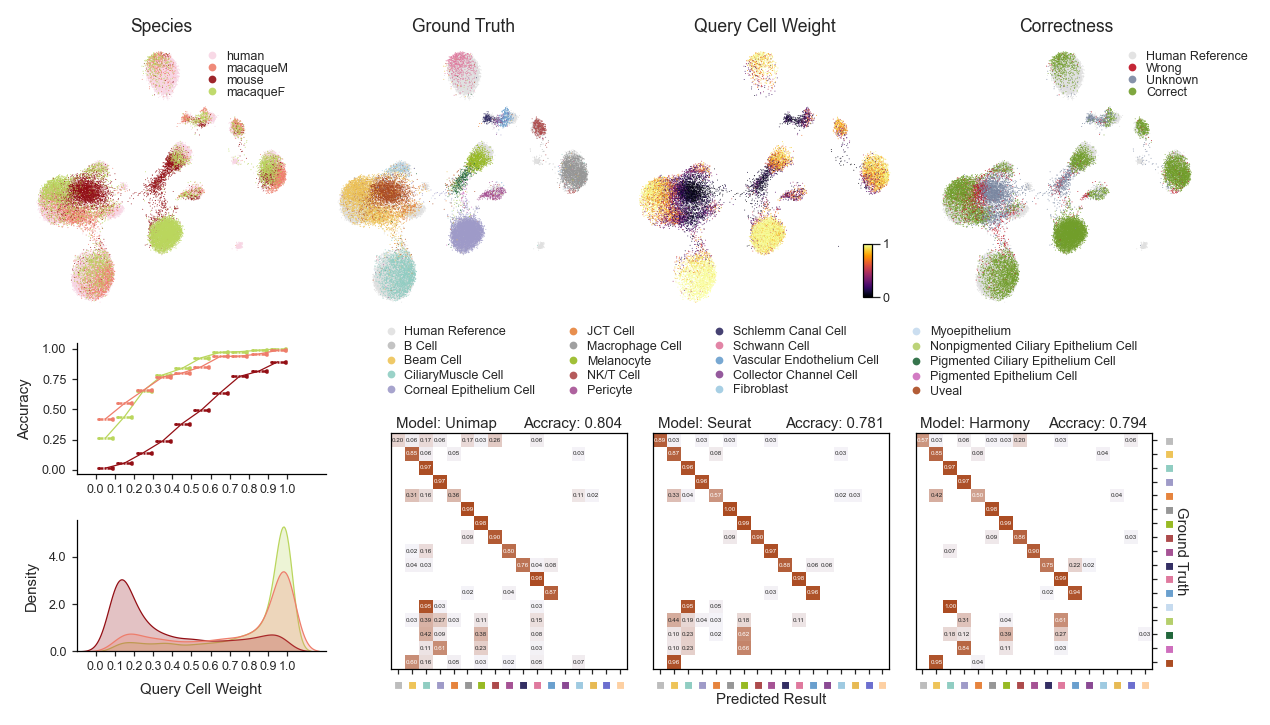

In [9]:
fig

In [10]:
# fig.savefig('../figs/fig6.pdf', dpi=720)